In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/Toshiba/Documents/GitHub/MIE_2.02_GeoInfo_WS2020/data/generated/DWD/hourly/precipitation/historical/prec_ts_appended_4.csv',sep=";")
data2 = pd.read_csv('Area_of_interest_NRW_13_Counties.csv',sep=",")

In [3]:
data.tail()

,mess_datum,stations_id,r1,longitude,latitude
244838,2017-08-16 20:00:00,15000,0.0,6.0244,50.7983
244839,2017-08-16 21:00:00,15000,0.0,6.0244,50.7983
244840,2017-08-16 22:00:00,15000,0.0,6.0244,50.7983
244841,2017-08-16 23:00:00,15000,0.0,6.0244,50.7983
244842,2017-08-17 00:00:00,15000,0.0,6.0244,50.7983


In [4]:
data['mess_datum']=pd.to_datetime(data.mess_datum, format='%Y/%m/%d %H:%M:%S')

In [5]:
data.insert(loc=5, column='day', value=(data.mess_datum.dt.date))

In [6]:
data.tail()

,mess_datum,stations_id,r1,longitude,latitude,day
244838,2017-08-16 20:00:00,15000,0.0,6.0244,50.7983,2017-08-16
244839,2017-08-16 21:00:00,15000,0.0,6.0244,50.7983,2017-08-16
244840,2017-08-16 22:00:00,15000,0.0,6.0244,50.7983,2017-08-16
244841,2017-08-16 23:00:00,15000,0.0,6.0244,50.7983,2017-08-16
244842,2017-08-17 00:00:00,15000,0.0,6.0244,50.7983,2017-08-17


### Cumulating daily precipitation for four months may 2017 to august 2017

In [62]:
indx = data[data['stations_id'].isin([216,389,390,613,644,796,934,1300,2483,2947,3028,3031,3098,3215,3499,4127,4313,4368,
                                      4400,4488,4692,5347,5360,5468,5480,5619,5699,6264,6276,6313,7330,13700,13713])]
indx_1 = data[data['stations_id'].isin([4692,5468,6276])]

In [63]:
indx_1

,mess_datum,stations_id,r1,longitude,latitude,day


In [9]:
#hourly precipitation rate to daily rate
df_1 = indx.groupby(['day','stations_id','longitude','latitude'])['r1'].sum().to_frame(name = 'daily_prep').reset_index()

In [10]:
df_1

,day,stations_id,longitude,latitude,daily_prep
0,2017-04-16,216,7.8807,51.1143,4.3
1,2017-04-16,389,8.4318,51.0148,5.0
2,2017-04-16,390,8.3683,50.9837,2.2
3,2017-04-16,613,9.2324,51.5677,0.8
4,2017-04-16,644,9.1738,51.7049,1.9
...,...,...,...,...,...
3715,2017-08-17,6264,8.6500,51.4140,0.0
3716,2017-08-17,6313,7.4672,51.2488,0.0
3717,2017-08-17,7330,7.9780,51.4633,0.0
3718,2017-08-17,13700,7.3411,51.3329,0.0


In [11]:
#daily precipitation to overall rainfall for four months(may-august)
df_2 = df_1.groupby(['stations_id','longitude','latitude'])['daily_prep'].sum().to_frame(name = 'overall_rain').reset_index()

In [12]:
df_2 # 3 stations are missing,should be 33 stations!! dont know why???

,stations_id,longitude,latitude,overall_rain
0,216,7.8807,51.1143,322.7
1,389,8.4318,51.0148,335.8
2,390,8.3683,50.9837,378.5
3,613,9.2324,51.5677,395.1
4,644,9.1738,51.7049,387.6
5,796,8.1257,50.7556,417.4
6,934,8.5658,51.7835,348.4
7,1300,8.1565,51.2540,412.1
8,2483,8.4891,51.1803,501.6
9,2947,8.0348,51.1333,294.7


In [13]:
altitude = data2['altitude']

In [14]:
df_2 = df_2.join(altitude)

In [15]:
df_2 #check altitudes!!! some are wrong

,stations_id,longitude,latitude,overall_rain,altitude
0,216,7.8807,51.1143,322.7,298
1,389,8.4318,51.0148,335.8,436
2,390,8.3683,50.9837,378.5,610
3,613,9.2324,51.5677,395.1,206
4,644,9.1738,51.7049,387.6,150
5,796,8.1257,50.7556,417.4,412
6,934,8.5658,51.7835,348.4,88
7,1300,8.1565,51.2540,412.1,351
8,2483,8.4891,51.1803,501.6,839
9,2947,8.0348,51.1333,294.7,286


## Plotting the relationship of the Overall Rainfall vs Altitude

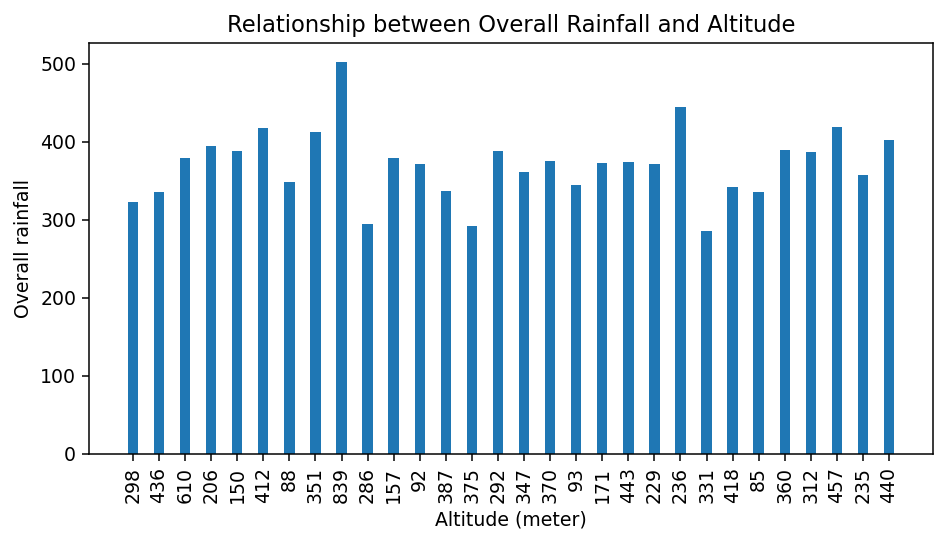

In [64]:
w = 0.4
fig = plt.figure(dpi= 136, figsize=(8,4))

bar1 = np.arange(len(df_2['stations_id']))
#bar2 = [i+w for i in bar1]

plt.bar(bar1,df_2['overall_rain'],w)


plt.xlabel('Altitude (meter)')
plt.ylabel('Overall rainfall')
plt.title('Relationship between Overall Rainfall and Altitude')
plt.xticks(bar1,df_2['altitude'],rotation=90)

plt.show()

In [17]:
filepathname = "overall_rainfall_13_counties.csv"
print("df_2 saved to: %s" % (filepathname))
df_2.to_csv(filepathname,sep=";")

df_2 saved to: overall_rainfall_13_counties.csv


## Comparing station altitudes with the DTM altitudes

In [21]:
data_dtm = pd.read_csv('DTM_and_stations_altitudes.csv',sep=",")

In [46]:
data_dtm.head()

,field_1,stations_i,longitude,latitude,overall_ra,altitude,DTM_German
0,0,216,7.8807,51.1143,322.7,298,298.10001
1,1,389,8.4318,51.0148,335.8,436,433.50000
2,2,390,8.3683,50.9837,378.5,610,609.10004
3,3,613,9.2324,51.5677,395.1,206,205.60001
4,4,644,9.1738,51.7049,387.6,150,150.20000


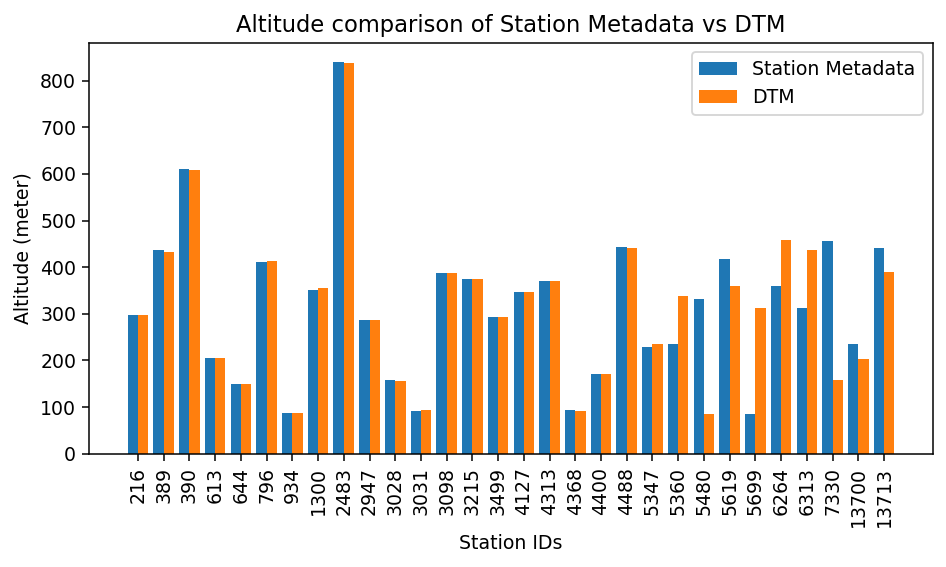

In [65]:
w = 0.4
fig = plt.figure(dpi= 136, figsize=(8,4))

bar1 = np.arange(len(data_dtm['stations_i']))
bar2 = [i+w for i in bar1]

plt.bar(bar1,data_dtm['altitude'],w,label='Station Metadata')
plt.bar(bar2,data_dtm['DTM_German'],w,label='DTM')

plt.xlabel('Station IDs')
plt.ylabel('Altitude (meter)')
plt.title('Altitude comparison of Station Metadata vs DTM')
plt.xticks(bar1+w/2,data_dtm['stations_i'],rotation=90)
plt.legend()
plt.show()